# Практическая работа по уменьшению размерности данных Методом главных компонент.

# Import библиотек

In [1]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn


from sklearn.preprocessing import StandardScaler # Стандартизация от мира scikit-learn

import plotly.express as px # yet another 3-D рисовалка
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('dark_background')

# Набор данных MIST

In [3]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
# для этого нам необходимо знать имя набора данных и версию
# также указываем что хотим чтобы скачалось в формате признаки/целевые метки (return_X_y)
# иначе он выгрузит в формате словаря с полной выкладкой
# наконец попросим выгрузить данные в формате dataframe (as_frame)
# иначе будут numpy массивы
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True, parser='auto')
X = X / 255. # нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


# Разные примеры

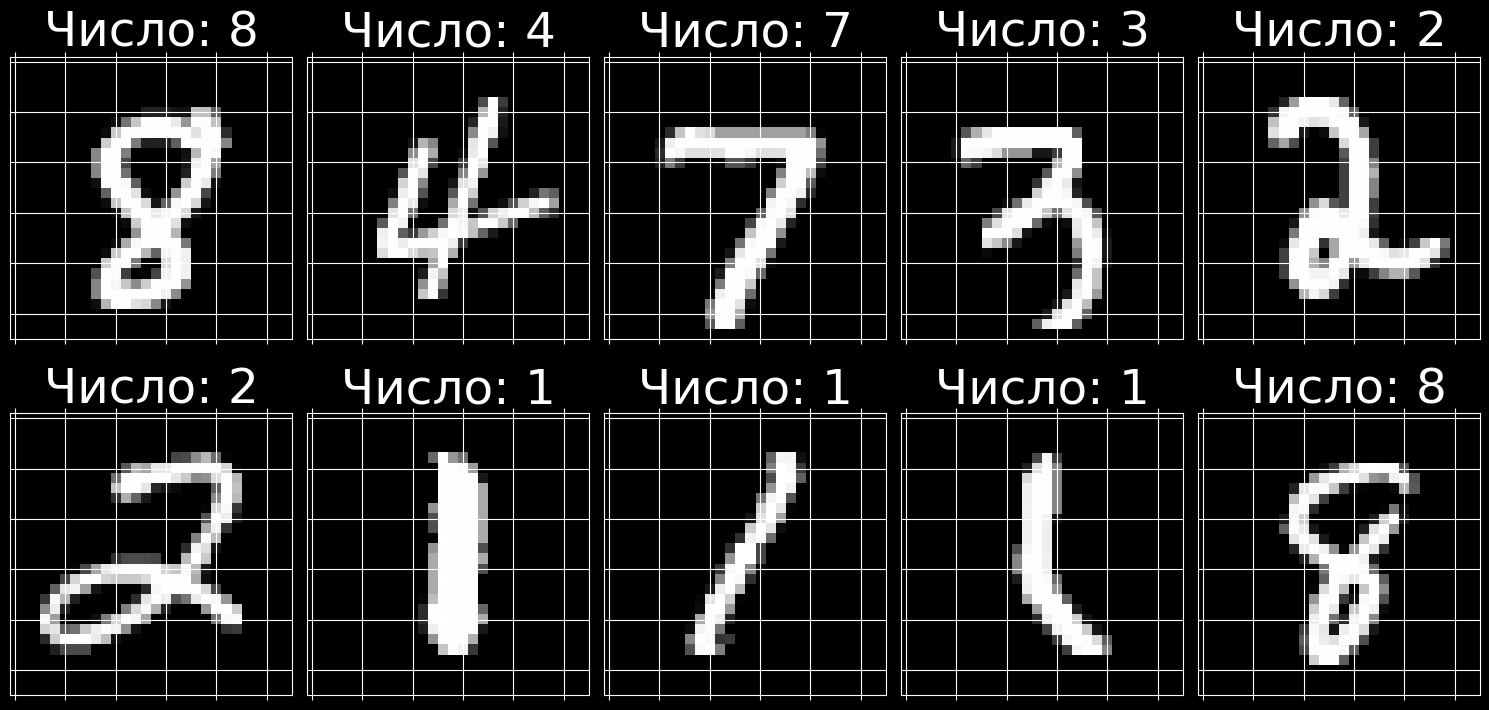

In [6]:
#@title Разные примеры { run: "auto" }
n =  15258 #@param {type:"slider", min:1, max:69984, step:1}

# создаем полотно
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()


In [7]:
X_plot = X.loc[0:1000,'pixel371':'pixel375'].copy() # данные из середины

/home/synrocka/anaconda3/envs/Diabetes-Prediction/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/synrocka/anaconda3/envs/Diabetes-Prediction/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/synrocka/anaconda3/envs/Diabetes-Prediction/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/synrocka/anaconda3/envs/Diabetes-Prediction/lib/python3.12/site-packages/seaborn/_oldcor

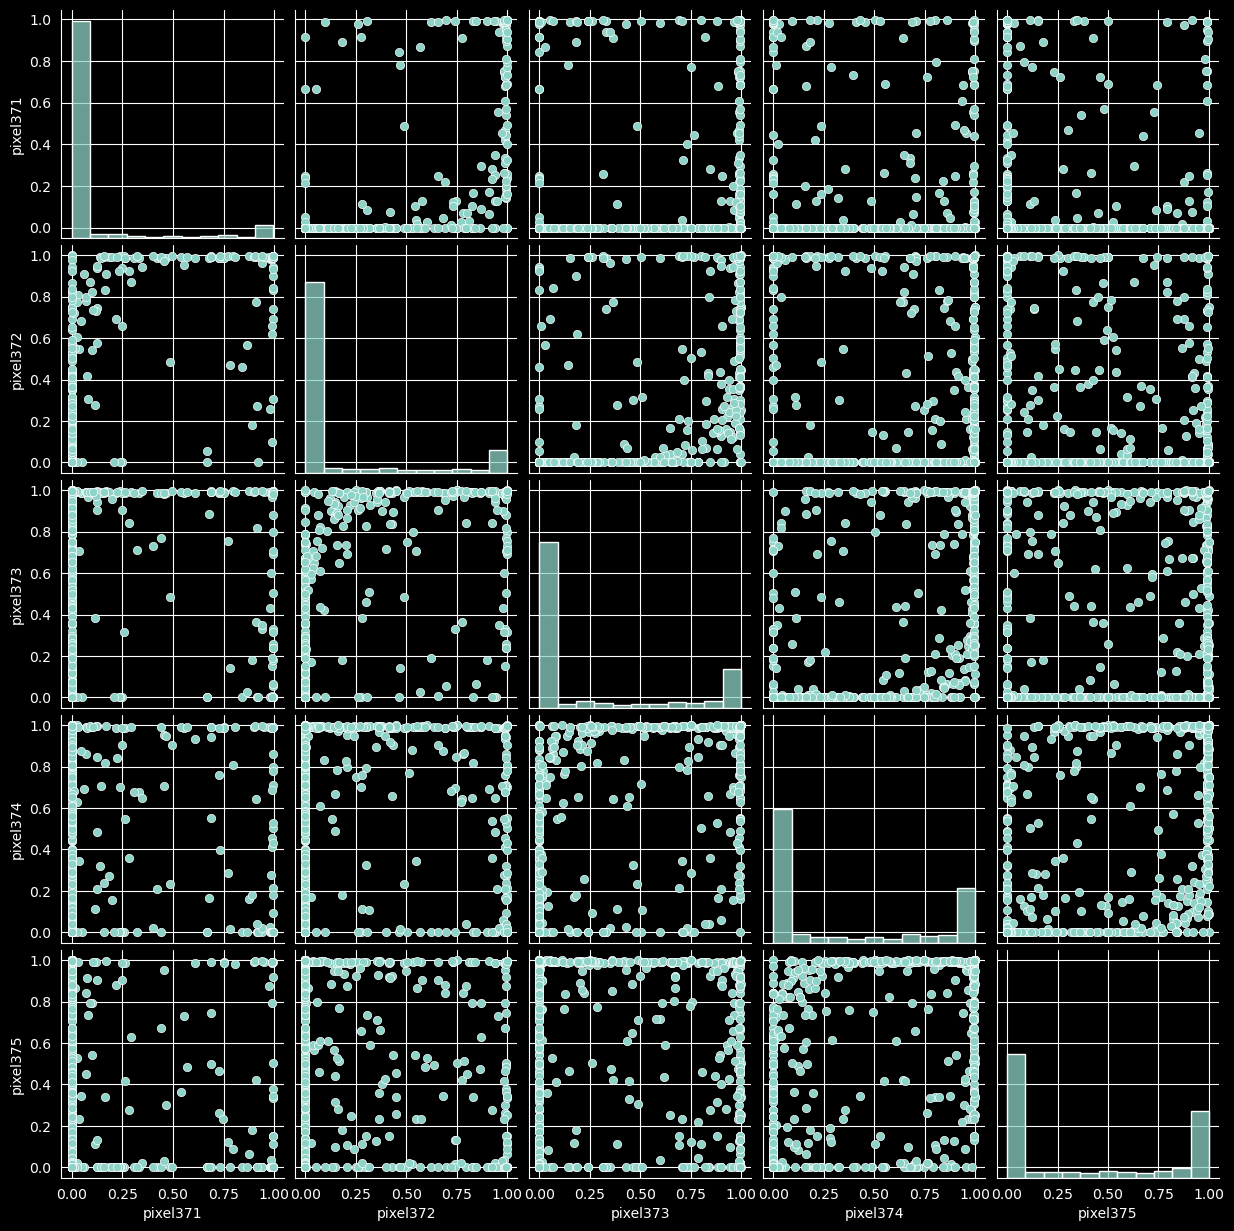

In [8]:
sns.pairplot(X_plot);

# Применение метода главных компонент

In [9]:
pca = PCA(n_components=784)
pca.fit(X)

PCA(n_components=784)

In [10]:
pca_result_mnist = pca.transform(X)

# Визуализация

In [11]:
EV=pca.explained_variance_ratio_

## Построение графиков объясненной дисперсии

(0.0, 1.1)

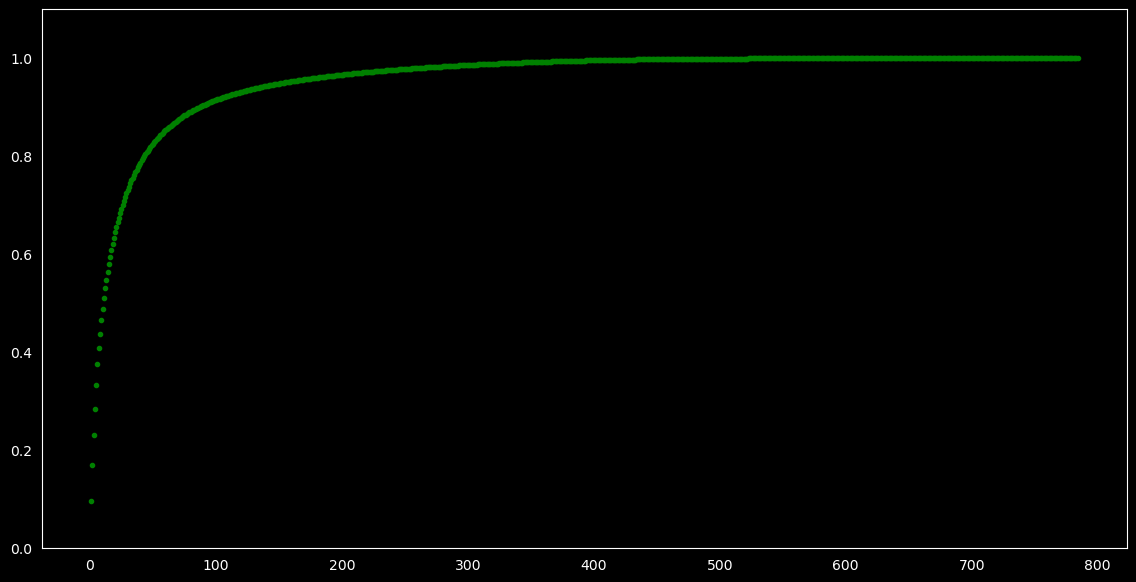

In [12]:
fig = plt.figure( figsize=(14,7) )
plt.plot(np.array(range(len(EV)))+1,np.cumsum(EV),'o',linewidth=1, markersize=3, c = 'g')
plt.grid()
plt.ylim(0,1.1)

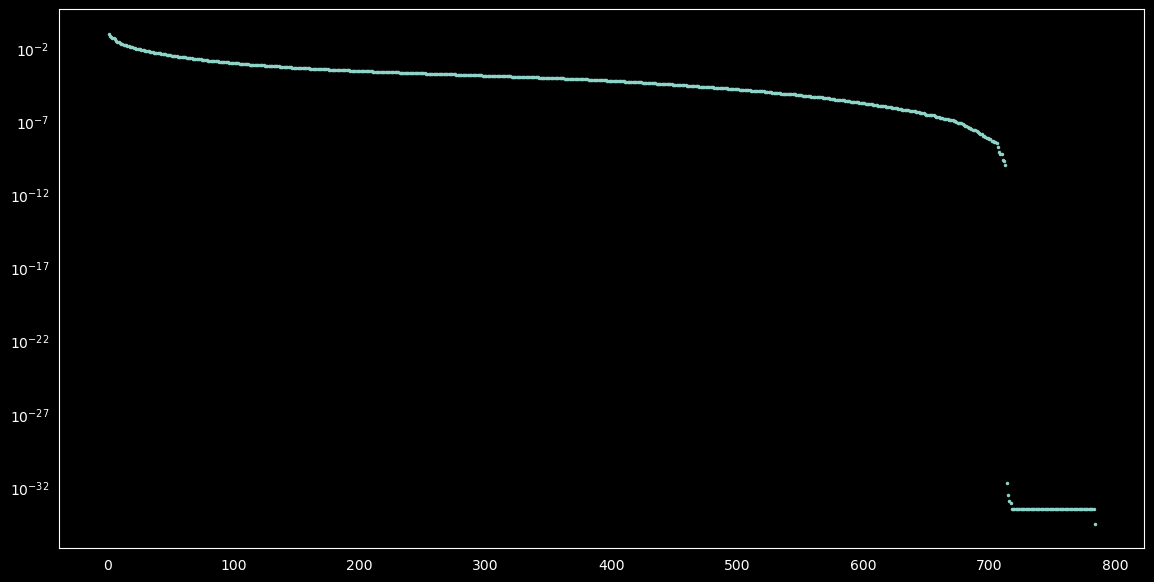

In [13]:
fig = plt.figure( figsize=(14,7) )
plt.semilogy(np.array(range(len(EV)))+1,EV,'.',linewidth=1, markersize=3)
plt.grid()

## Очень интересный график

In [14]:
def plot_multi(data, y,  names):
    """Нескольких двумерных проекций многомерных данных (pairplot на минималках)
    Входные переменные:
    ===========
    data: данные
    y: целевые метки
    names: подписи к осям
    """
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2
    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-9,10])
        ax.set_ylim([-7,7])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Цифры",
                        fontsize = 10) # собираем легенду
        ax.add_artist(legend1)

In [15]:
pca_names = [str(x+1)+'-я главная компонента' for x in range(4)]

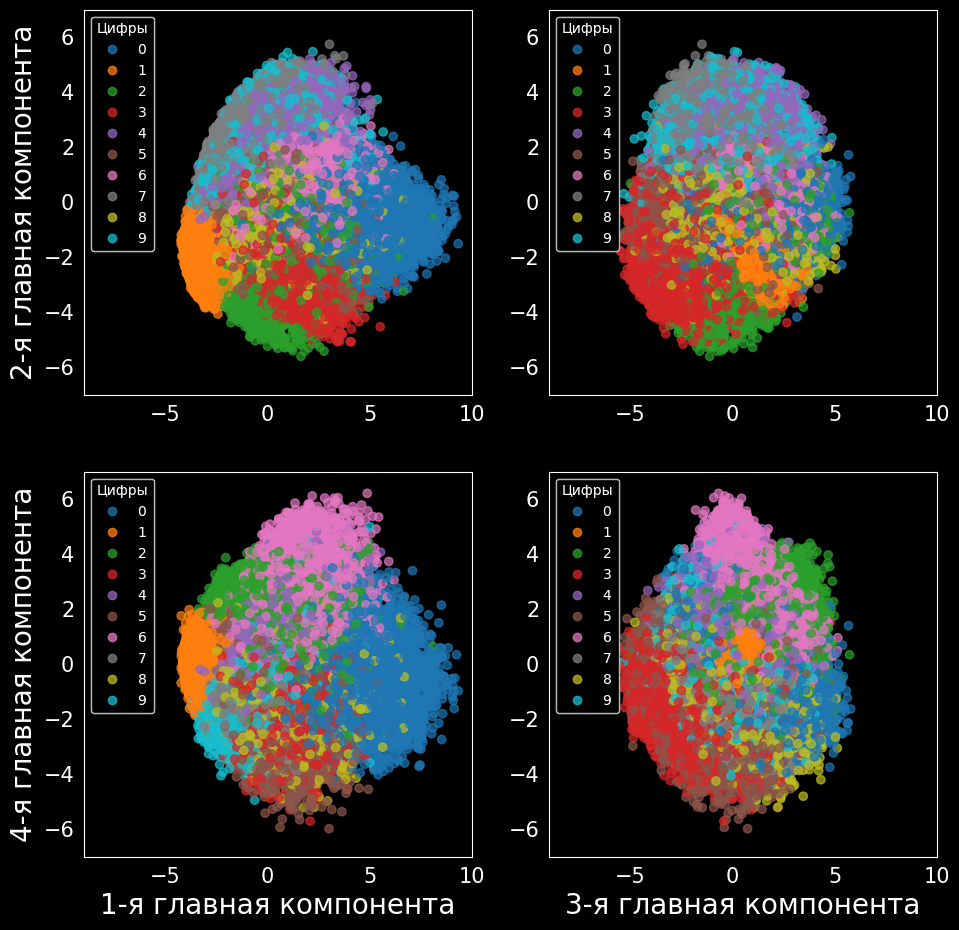

In [16]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);